In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')  # Suppress warning

# Final models comparison and summary

In [158]:
base_url = "https://raw.githubusercontent.com/filipecorreia23/Bank-Term-Deposit-Prediction/main/output"

# importing dataset
models_summary = pd.read_csv(f"{base_url}/models_comparison.csv", sep=';')
models_summary.fillna('-', inplace=True)

models_summary

,Model,Class,Precision,Recall,F1-Score,Support,Accuracy,Macro Avg Precision,Macro Avg Recall,Macro Avg F1-Score,Weighted Avg Precision,Weighted Avg Recall,Weighted Avg F1-Score,AUC Score
0,GBM,No,0.92,0.97,0.95,7635.0,-,-,-,-,-,-,-,-
1,GBM,Yes,0.63,0.4,0.49,1004.0,-,-,-,-,-,-,-,-
2,GBM,General,-,-,-,-,0.89,0.78,0.68,0.72,0.89,0.9,0.89,0.91
3,XGBoost,No,0.96,0.9,0.93,7635.0,-,-,-,-,-,-,-,-
4,XGBoost,Yes,0.49,0.73,0.58,1004.0,-,-,-,-,-,-,-,-
5,XGBoost,General,-,-,-,-,0.88,0.72,0.81,0.76,0.91,0.88,0.89,0.91
6,LightGBM,No,0.97,0.91,0.94,7635.0,-,-,-,-,-,-,-,-
7,LightGBM,Yes,0.52,0.75,0.61,1004.0,-,-,-,-,-,-,-,-
8,LightGBM,General,-,-,-,-,0.89,0.74,0.83,0.77,0.91,0.89,0.9,0.93
9,CatBoost,No,0.97,0.9,0.93,7635.0,-,-,-,-,-,-,-,-


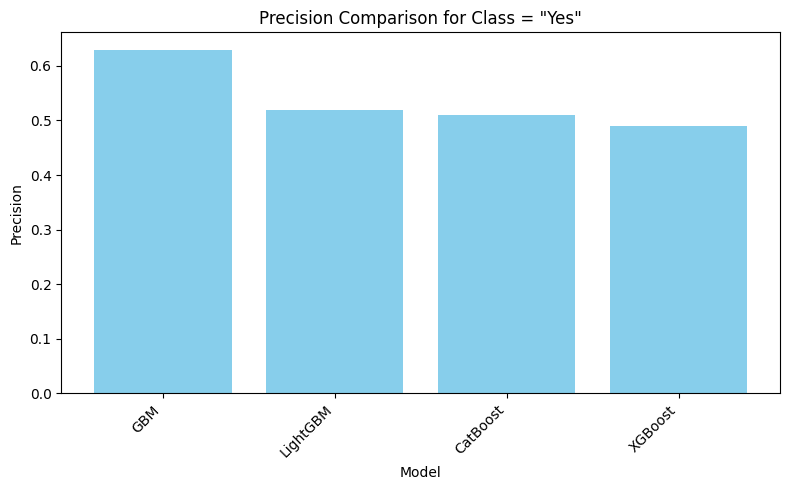

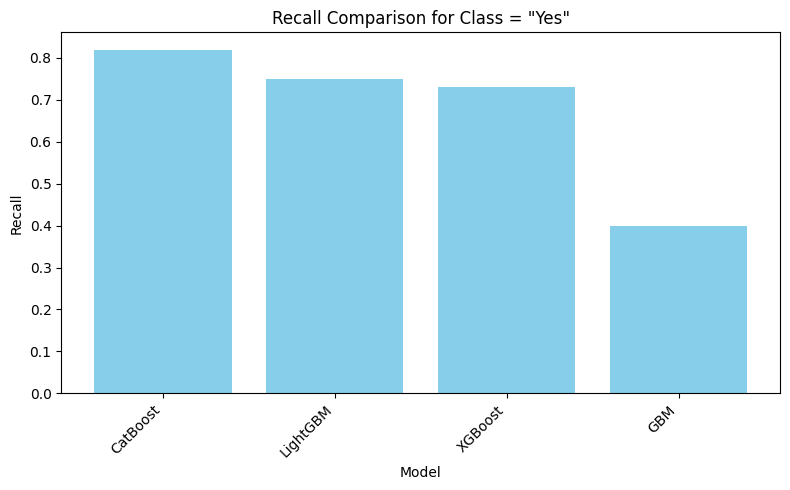

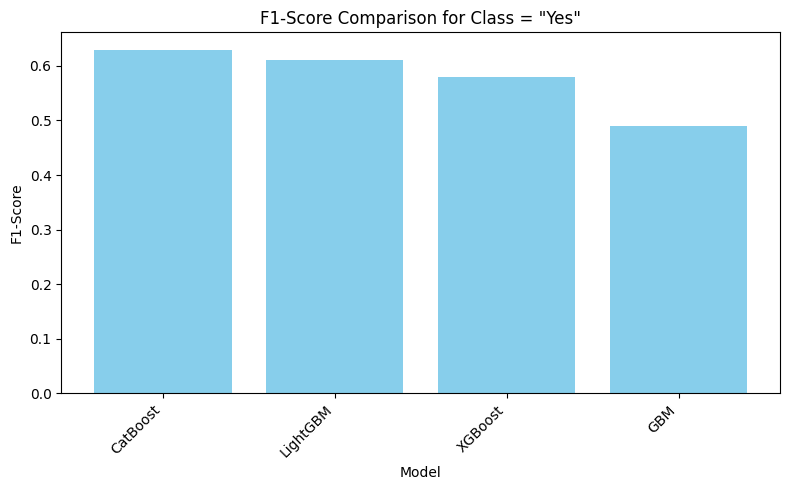

In [160]:
for col in ["Precision", "Recall", "F1-Score"]:
    models_summary[col] = pd.to_numeric(models_summary[col], errors='coerce')

metrics = ["Precision", "Recall", "F1-Score"]

for metric in metrics:
    filtered_data = models_summary[models_summary["Class"] == "Yes"].dropna(subset=[metric])
    filtered_data = filtered_data.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(8, 5))
    plt.bar(filtered_data["Model"], filtered_data[metric], color='skyblue')
    plt.title(f'{metric} Comparison for Class = "Yes"')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

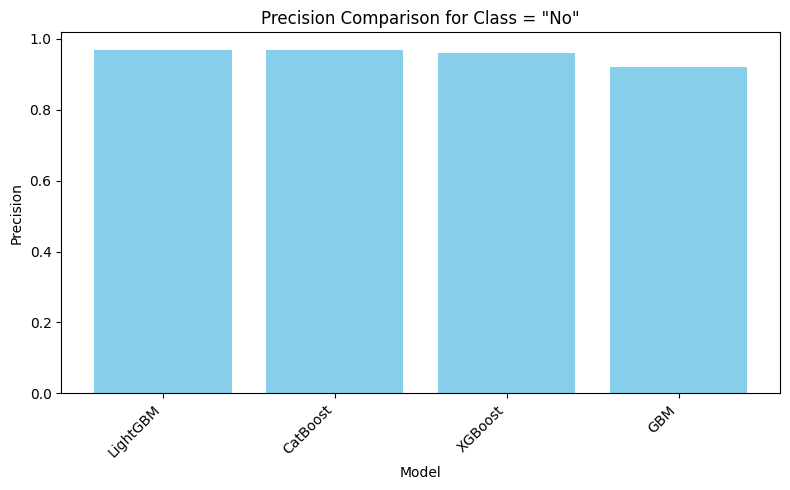

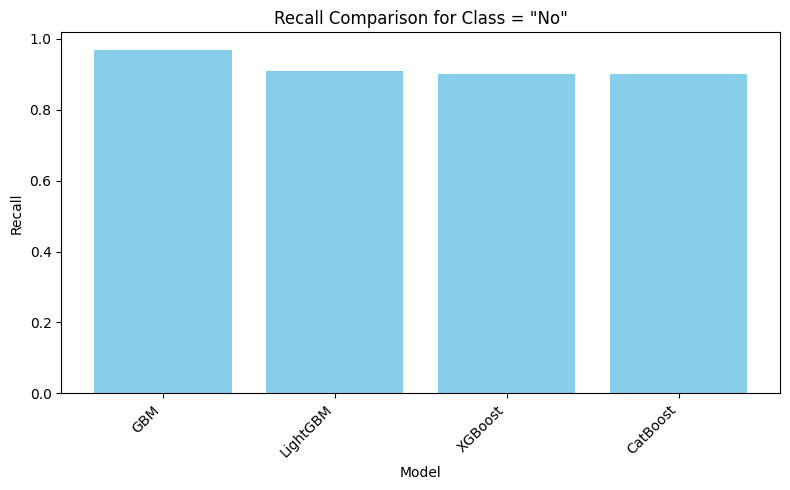

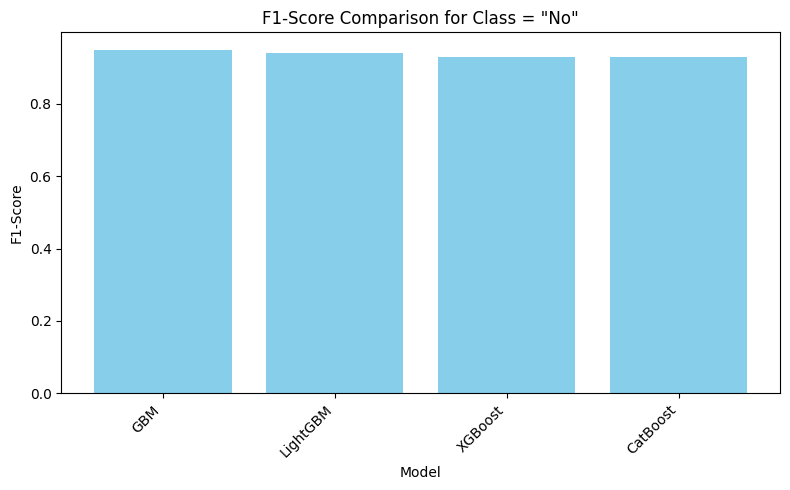

In [164]:
for col in ["Precision", "Recall", "F1-Score"]:
    models_summary[col] = pd.to_numeric(models_summary[col], errors='coerce')

metrics = ["Precision", "Recall", "F1-Score"]

for metric in metrics:
    filtered_data = models_summary[models_summary["Class"] == "No"].dropna(subset=[metric])
    filtered_data = filtered_data.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(8, 5))
    plt.bar(filtered_data["Model"], filtered_data[metric], color='skyblue')
    plt.title(f'{metric} Comparison for Class = "No"')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

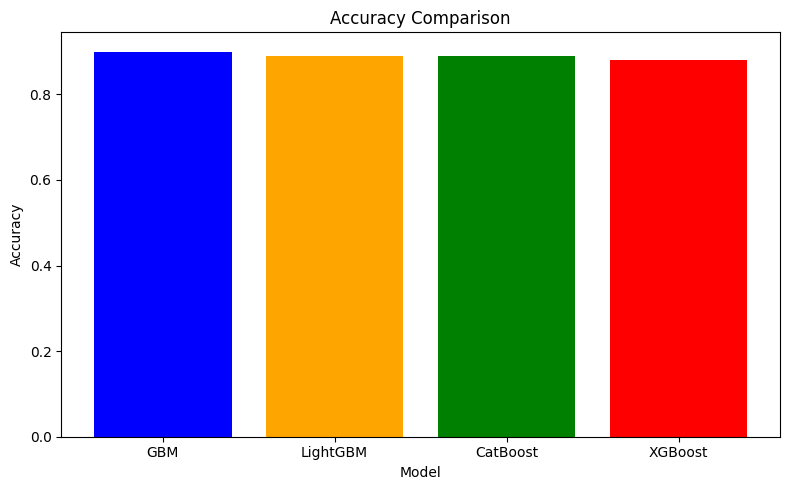

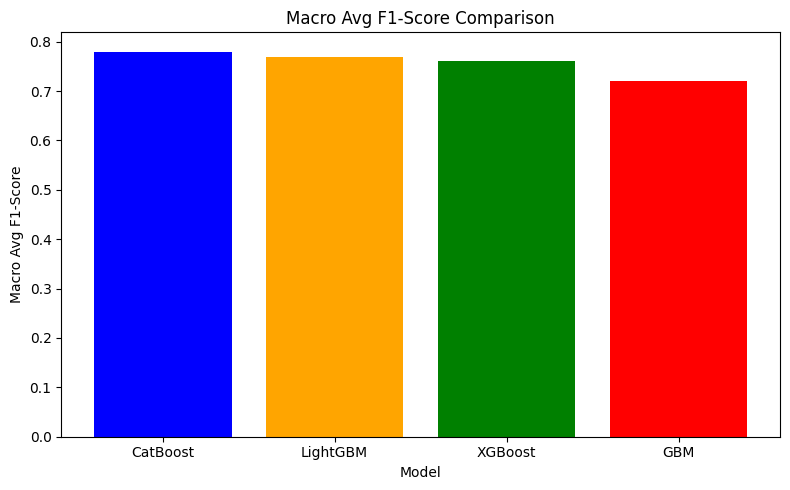

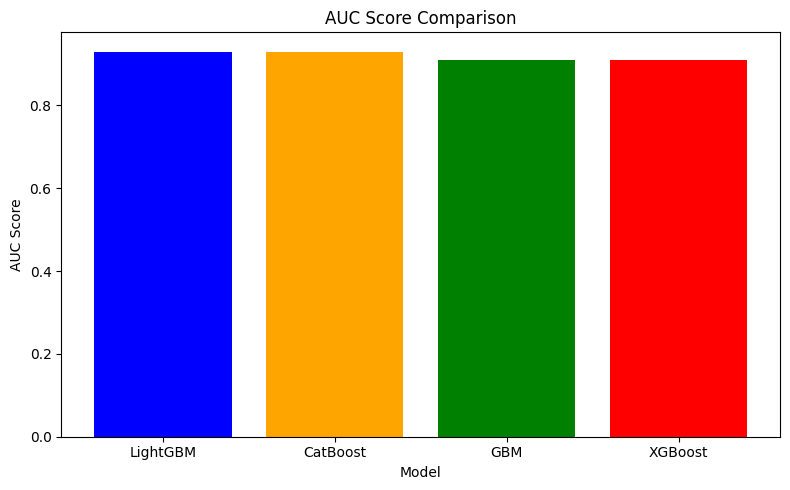

In [166]:
data = {"Model": ["GBM", "XGBoost", "LightGBM", "CatBoost"],
        "Accuracy": [0.90, 0.88, 0.89, 0.89],
        "Macro Avg F1-Score": [0.72, 0.76, 0.77, 0.78],
        "AUC Score": [0.91, 0.91, 0.93, 0.93],
       }

general = pd.DataFrame(data)

metrics = ["Accuracy", "Macro Avg F1-Score", "AUC Score"]
colors = ["blue", "orange", "green", "red"]

for metric in metrics:
    sorted_data = general.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(8, 5))
    plt.bar(sorted_data["Model"], sorted_data[metric], color=colors[:len(sorted_data)])
    plt.title(f'{metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.tight_layout()
    
    plt.show()

## Summary

The models show a good performance with relatively close metrics, but some key improvements stand out. **GBM (Gradient Boosting Machine)**, our baseline model without hyperparameter tuning, performs exceptionally well for the "No" class, achieving a 95% F1-score. However, it struggles with the "Yes" class, with a low recall of 40% and an F1-score of 49%. **XGBoost** improves recall for the "Yes" class to 73% after hyperparameter tunning, though it sacrifices some precision, resulting in an F1-score of 58%. **LightGBM** offers a better balance with a 94% F1-score for the "No" class and 61% for the "Yes" class, after hyperparameter tunning. Finally, **CatBoost** delivers the best overall performance, with an F1-score of 63% and the highest recall (82%) for the "Yes" class, while maintaining a strong 93% F1-score for the "No" class. Important to mention, that F1-score for the "Yes" class (the small class) improved for all models after hyperparameter tunning.

## Key Achievements
One major achievement across all models was improving the F1-score after hyperparameter tuning, particularly for the "Yes" class (subscribers). Recall increased significantly, helping us better identify true positives—individuals who subscribed to a term deposit. For banks, these are the leads most likely to convert, making them the focus of cold-call campaigns. While the precision for the "Yes" class dropped, this trade-off is valuable since it allows us to target more potential buyers, even if a few false positives are included. Compared to the baseline GBM, the tuned models show much better recall for the minority class, highlighting the impact of tuning.

## Additional Insights
Feature selection after hyperparameter tuning didn’t add value, but the earlier feature engineering and dataset adjustments ensured the models worked with the most relevant data.

## Conclusion
**CatBoost** leads the pack for targeting potential subscribers effectively, with **LightGBM** as a strong runner-up. The baseline GBM serves as a great comparison, showing how much tuning improved the models.